Wczytanie pakietów i danych

In [2]:
using CSV, DataFrames, PrettyTables, TypedTables, TimeSeries, Dates, Plots, Statistics, CovarianceMatrices, Random
ENV["COLUMNS"] = 200

200

In [3]:
df = CSV.read("Notowania_spolek.csv", DataFrame)


,Data,MMM,T,ADBE,BAC,CVX,HLT,SBUX
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2021-05-27,203.24,22.4396,498.28,42.55,103.01,126.27,113.51
2,2021-05-28,203.04,22.2281,504.58,42.39,103.79,125.27,113.88
3,2021-06-01,203.2,22.145,495.91,42.92,106.65,126.61,113.34
4,2021-06-02,203.29,22.364,495.77,42.94,108.08,125.17,113.0
5,2021-06-03,203.67,22.077,493.14,43.25,107.59,123.13,111.12
6,2021-06-04,206.05,22.1073,504.5,43.27,108.45,124.75,111.99
7,2021-06-07,203.73,21.9637,509.47,43.12,107.75,124.9,111.33
8,2021-06-08,203.59,21.8882,509.2,42.88,108.73,127.84,111.52
9,2021-06-09,202.74,21.9109,514.68,42.32,107.78,126.45,111.39


Tworzymy listę spółek

In [3]:
stocks = ["MMM", "T", "ADBE", "BAC", "CVX", "HLT", "SBUX"]
names(df)

8-element Vector{String}:
 "Data"
 "MMM"
 "T"
 "ADBE"
 "BAC"
 "CVX"
 "HLT"
 "SBUX"

Liczymy zanualizowaną dzienną stopę zwrotu: Dzienna stopa zwrotu = (Cena zamknięcia D/Cena zamknięcia D-1) * 252

In [4]:
function pct_change(input::Vector{Float64})::Vector{Float64}
    result = [NaN]
    for i in 2:length(input)
        push!(result, (input[i] - input[i-1])/abs(input[i-1]))
    end
    return result
end

pct_change (generic function with 1 method)

In [5]:
lista = []
for i in 2:size(df,2)
    push!(lista, pct_change(df[:,i]))
end


In [6]:
df1 = hcat(DataFrame(Date = df[:,1]), DataFrame(lista, stocks))

,Date,MMM,T,ADBE,BAC,CVX,HLT,SBUX
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2021-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-05-28,-0.000984117,-0.00942438,0.0126435,-0.00376028,0.00757207,-0.00791954,0.00325958
3,2021-06-01,0.000788042,-0.0037377,-0.0171826,0.0125029,0.0275557,0.0106969,-0.00474184
4,2021-06-02,0.000442894,0.0098908,-0.00028234,0.000466007,0.0134083,-0.0113735,-0.00299979
5,2021-06-03,0.00186928,-0.0128335,-0.00530483,0.0072194,-0.00453373,-0.0162978,-0.0166371
6,2021-06-04,0.0116856,0.00136839,0.023036,0.000462428,0.00799332,0.0131569,0.00782933
7,2021-06-07,-0.0112594,-0.00649131,0.00985134,-0.00346663,-0.00645456,0.00120242,-0.00589335
8,2021-06-08,-0.000687184,-0.00343871,-0.000529941,-0.00556582,0.00909516,0.0235388,0.00170659
9,2021-06-09,-0.00417501,0.00103512,0.0107619,-0.0130597,-0.00873728,-0.010873,-0.00116569


Tworzymy wykres przedstawiające dzienne stopy zwrotu dla każdego z indeksów

In [7]:
df_noNaN = df1[2:nrow(df1),:] 


,Date,MMM,T,ADBE,BAC,CVX,HLT,SBUX
,Date,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2021-05-28,-0.000984117,-0.00942438,0.0126435,-0.00376028,0.00757207,-0.00791954,0.00325958
2,2021-06-01,0.000788042,-0.0037377,-0.0171826,0.0125029,0.0275557,0.0106969,-0.00474184
3,2021-06-02,0.000442894,0.0098908,-0.00028234,0.000466007,0.0134083,-0.0113735,-0.00299979
4,2021-06-03,0.00186928,-0.0128335,-0.00530483,0.0072194,-0.00453373,-0.0162978,-0.0166371
5,2021-06-04,0.0116856,0.00136839,0.023036,0.000462428,0.00799332,0.0131569,0.00782933
6,2021-06-07,-0.0112594,-0.00649131,0.00985134,-0.00346663,-0.00645456,0.00120242,-0.00589335
7,2021-06-08,-0.000687184,-0.00343871,-0.000529941,-0.00556582,0.00909516,0.0235388,0.00170659
8,2021-06-09,-0.00417501,0.00103512,0.0107619,-0.0130597,-0.00873728,-0.010873,-0.00116569
9,2021-06-10,0.00192365,0.00586006,0.0404912,-0.0148866,0.00584529,0.00110715,0.00736152


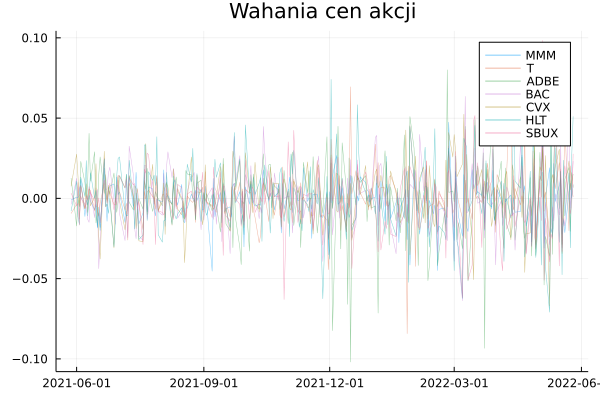

In [8]:
using Plots

x = df_noNaN.Date
y = Matrix(df_noNaN[:,2:8])
plot(x, y, lw = 0.5, alpha = 0.5, labels = ["MMM" "T" "ADBE" "BAC" "CVX" "HLT" "SBUX"], title = "Wahania cen akcji")


In [9]:
savefig("/Users/marcinzurek/Desktop/akcje.png")

Tworzymy ramki danych bez daty (do policzenia macierzy kowariancji) oraz ramkę bez pierwszego wiersza NaN

In [10]:
df_no_date = select!(df1, Not(:Date))
df_noNaN_noDate = df_no_date[2:nrow(df_no_date),:] 

,MMM,T,ADBE,BAC,CVX,HLT,SBUX
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.000984117,-0.00942438,0.0126435,-0.00376028,0.00757207,-0.00791954,0.00325958
2,0.000788042,-0.0037377,-0.0171826,0.0125029,0.0275557,0.0106969,-0.00474184
3,0.000442894,0.0098908,-0.00028234,0.000466007,0.0134083,-0.0113735,-0.00299979
4,0.00186928,-0.0128335,-0.00530483,0.0072194,-0.00453373,-0.0162978,-0.0166371
5,0.0116856,0.00136839,0.023036,0.000462428,0.00799332,0.0131569,0.00782933
6,-0.0112594,-0.00649131,0.00985134,-0.00346663,-0.00645456,0.00120242,-0.00589335
7,-0.000687184,-0.00343871,-0.000529941,-0.00556582,0.00909516,0.0235388,0.00170659
8,-0.00417501,0.00103512,0.0107619,-0.0130597,-0.00873728,-0.010873,-0.00116569
9,0.00192365,0.00586006,0.0404912,-0.0148866,0.00584529,0.00110715,0.00736152


Liczymy macierz kowariancji ze stóp zwrotów spółek

In [11]:
#funkcja do wyliczania macierzy wariancji kowariancji
function covmat(df)
    nc = ncol(df)
    t = zeros(nc, nc)
    for i in 1:nc
        for j in 1:nc
            t[i,j] = cov(df[:,i], df[:,j])
        end
    end
    return t
end

covmat (generic function with 1 method)

In [12]:
cov_matrix = covmat(df_noNaN_noDate)

7×7 Matrix{Float64}:
 0.000163862   6.28355e-5    6.27699e-5   0.000110405  6.44021e-5   6.40794e-5   9.50993e-5
 6.28355e-5    0.000233827  -1.42915e-5   7.35803e-5   3.96727e-5   4.94882e-5   6.30207e-5
 6.27699e-5   -1.42915e-5    0.000542231  9.29267e-5   5.97057e-7   0.00018293   0.000218841
 0.000110405   7.35803e-5    9.29267e-5   0.000336918  0.00012356   0.000200351  0.000138264
 6.44021e-5    3.96727e-5    5.97057e-7   0.00012356   0.000285907  9.57771e-5   3.95192e-5
 6.40794e-5    4.94882e-5    0.00018293   0.000200351  9.57771e-5   0.000476705  0.000210116
 9.50993e-5    6.30207e-5    0.000218841  0.000138264  3.95192e-5   0.000210116  0.00036274

Ponieważ próbujemy zoptymalizować portfel przez zmianę alokacji wag, zainicjalizujmy nasze wagi i obliczmy początkowe metryki za pomocą poniższej funkcji. Wagi muszą pochodzić z rozkładu równomiernego od 0 do 1 (ponieważ wagi oznaczają udziały procentowe) dlatego korzystamy z rozkładu jednostajnego w przedziale (0,1)

In [13]:
Random.seed!(10)
weights = rand(length(stocks))
weights = weights/sum(weights)
weights


7-element Vector{Float64}:
 0.11970840130856619
 0.03485940393972595
 0.0638809472607762
 0.07360223582198164
 0.18230619243650156
 0.2134447592870498
 0.3121980599453986

Liczymy stopę zwrotu z portfela

In [14]:
means = []
for i in 1:size(df_noNaN_noDate,2)
    push!(means, mean(df_noNaN_noDate[:,i]))
end
means

7-element Vector{Any}:
 -0.0012016971227790797
 -8.691747613151027e-5
 -0.0005134203835903103
 -0.00042240846716660806
  0.0022840038399052926
  0.0006033017585032638
 -0.001490249586870363

In [15]:
portfolio_returns = (means*252)'*weights
portfolio_returns

-0.03297785615860911

Liczymy wariancję portfela jako iloczyn wag i kowariancji pomnożonej przez 252

In [16]:
portfolio_variance = weights'*(cov_matrix*252)*weights
portfolio_variance

0.041157038899127696

Tworzymy nową ramkę danych, do której wstawiamy obliczone charakterystyki portfela

In [17]:
function portfolio_metrics(weights, df)
    rf = 0.03
    rp = (means*252)'*weights 
    port_var = weights'*(covmat(df)*252)'*weights
    sharpe = (rp-rf)/sqrt(port_var)
    df_return = DataFrame(Oczekiwany_zwrot = rp,
                Wariancja_portfela = port_var,
                Odchylenie_standardowe_portfela = sqrt(port_var),
                Wskaźnik_Sharpa = sharpe)
    return df_return
end
portfolio_metrics(weights, df_noNaN_noDate)

,Oczekiwany_zwrot,Wariancja_portfela,Odchylenie_standardowe_portfela,Wskaźnik_Sharpa
,Float64,Float64,Float64,Float64
1,-0.0329779,0.041157,0.202872,-0.310432


Za pomocą symulacji Monte Carlo generujemy 10 000 portfeli inwestycyjnych

In [18]:
lista_kolumn = vcat(stocks, ["Oczekiwany zwrot","Wariancja portfela", "Odchylenie standardowe portfela", "Wskaźnik Sharpa"])
lista_kolumn

11-element Vector{String}:
 "MMM"
 "T"
 "ADBE"
 "BAC"
 "CVX"
 "HLT"
 "SBUX"
 "Oczekiwany zwrot"
 "Wariancja portfela"
 "Odchylenie standardowe portfela"
 "Wskaźnik Sharpa"

In [19]:
portfolios = DataFrame(MMM = Float64[], T = Float64[], ABDE = Float64[], BAC = Float64[], CVX = Float64[],
                        HLT = Float64[], SBUX = Float64[], Oczekiwany_zwrot = Float64[], Wariancja_portfela = Float64[],
                        Odchylenie_stanardowe_portfela = Float64[], Wskaznik_sharpa = Float64[])

,MMM,T,ABDE,BAC,CVX,HLT,SBUX,Oczekiwany_zwrot,Wariancja_portfela,Odchylenie_stanardowe_portfela,Wskaznik_sharpa
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64


In [20]:
Random.seed!(42)

for i in 1:10000
    weights = rand(length(stocks))
    weights = weights/sum(weights)
    metrics = portfolio_metrics(weights, df_noNaN_noDate)
    metrics_vector = Matrix(metrics)'
    vector = vcat(weights, metrics_vector)
    push!(portfolios, vector)
end
    
portfolios

,MMM,T,ABDE,BAC,CVX,HLT,SBUX,Oczekiwany_zwrot,Wariancja_portfela,Odchylenie_stanardowe_portfela,Wskaznik_sharpa
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.1695,0.121289,0.128579,0.189373,0.181351,0.0446801,0.165227,-0.041657,0.0310877,0.176317,-0.40641
2,0.200352,0.137007,0.0897424,0.198195,0.191686,0.102717,0.080301,-0.000592976,0.0303214,0.174131,-0.17569
3,0.250547,0.043722,0.132423,0.0930372,0.205728,0.235408,0.0391343,0.035637,0.0341859,0.184894,0.0304879
4,0.155282,0.0592106,0.180942,0.119834,0.0951936,0.130808,0.25873,-0.106974,0.0394739,0.19868,-0.689418
5,0.128488,0.226586,0.129404,0.0634814,0.290228,0.149679,0.0121342,0.117873,0.0283643,0.168417,0.521756
6,0.0255603,0.213854,0.158534,0.229792,0.0533092,0.169871,0.149079,-0.0568731,0.0382295,0.195524,-0.44431
7,0.204851,0.0416858,0.0710537,0.239825,0.0854231,0.175482,0.18168,-0.0900521,0.0388155,0.197016,-0.609351
8,0.217757,0.0983119,0.112586,0.192867,0.217992,0.12125,0.0392375,0.025975,0.0310408,0.176184,-0.0228453
9,0.0239582,0.246268,0.281624,0.0645068,0.193151,0.0829019,0.107589,0.0274185,0.032868,0.181295,-0.0142394


Sortujemy portfele malejąco według wskaźnika Sharpa

In [21]:
sort!(portfolios, [:Wskaznik_sharpa], rev = true)

,MMM,T,ABDE,BAC,CVX,HLT,SBUX,Oczekiwany_zwrot,Wariancja_portfela,Odchylenie_stanardowe_portfela,Wskaznik_sharpa
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.037799,0.145768,0.156626,0.0190061,0.601509,0.0301134,0.00917863,0.310414,0.0364718,0.190976,1.46832
2,0.0162996,0.0586994,0.0122041,0.0374245,0.507582,0.32441,0.0433801,0.313394,0.0463484,0.215287,1.31635
3,0.0506669,0.149431,0.0320898,0.0492444,0.507546,0.172286,0.0387353,0.275764,0.0368439,0.191948,1.28037
4,0.18784,0.0146165,0.0667441,0.0469181,0.534726,0.128927,0.0202292,0.248943,0.0374884,0.193619,1.13079
5,0.0942668,0.112488,0.137563,0.00684278,0.496559,0.0845118,0.0677688,0.223665,0.0328927,0.181363,1.06783
6,0.00855179,0.218738,0.010528,0.00721299,0.402203,0.274584,0.0781823,0.23437,0.0372532,0.193011,1.05885
7,0.0300854,0.253189,0.0434396,0.0194982,0.359604,0.294074,0.000110179,0.229292,0.0358925,0.189453,1.05193
8,0.119401,0.289833,0.0239683,0.0264828,0.483779,0.013847,0.0426891,0.216095,0.0316826,0.177996,1.0455
9,0.0236212,0.134878,0.043534,0.0310302,0.402537,0.281468,0.0829314,0.224293,0.0385899,0.196443,0.989054


Tworzymy histogram wskaźników Sharpa

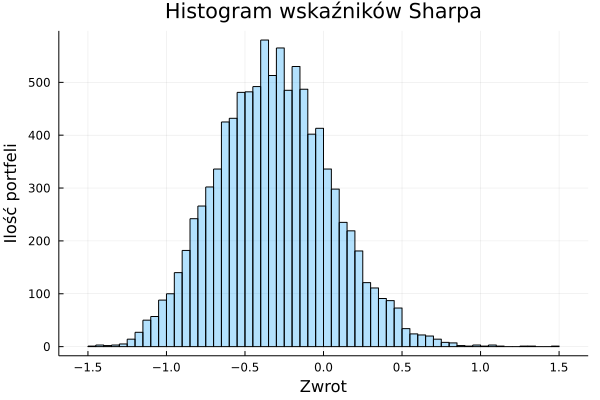

In [22]:
Plots.histogram(portfolios.Wskaznik_sharpa,
    label = reshape(collect(0:15),1,16),
    title = "Histogram wskaźników Sharpa",
    legend = false,
    xlabel = "Zwrot",
    ylabel = "Ilość portfeli",
    fillalpha = 0.3)


In [23]:
savefig("/Users/marcinzurek/Desktop/histogram.png")